<a href="https://colab.research.google.com/github/SiddheshSuryawanshi17/F1_DS-with-Python/blob/main/Formula1_EDA_Siddhesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Formula 1 Race Analysis - Exploratory Data Analysis (EDA)

###***By Siddhesh Suryawanshi***

This project focuses on analyzing Formula 1 race data using Exploratory Data Analysis techniques.



## Introduction

EDA helps us understand the dataset before applying any machine learning model.
It helps in finding patterns, missing values, and relationships in data.


In [208]:
df['Grid_Position'].value_counts().head()

,count
Grid_Position,
18,34
13,33
20,31
12,29
2,29


This shows the most frequent starting grid positions across all races.

In [209]:
df['Finish_Position'].value_counts().head()

,count
Finish_Position,
11,37
6,34
14,30
17,29
2,29


This shows the most common finishing positions in the dataset.

In [210]:
df['Grid_Position'].value_counts().head()

,count
Grid_Position,
18,34
13,33
20,31
12,29
2,29


This shows the most frequent starting grid positions across all races.

In [211]:
df['Finish_Position'].value_counts().head()

,count
Finish_Position,
11,37
6,34
14,30
17,29
2,29


This shows the most common finishing positions in the dataset.

In [212]:
df['Grid_Position'].value_counts().head()

,count
Grid_Position,
18,34
13,33
20,31
12,29
2,29


This shows the most frequent starting grid positions across all races.

In [213]:
df['Finish_Position'].value_counts().head()

,count
Finish_Position,
11,37
6,34
14,30
17,29
2,29


This shows the most common finishing positions in the dataset.

In [214]:
df['Driver'].nunique()

10

This shows the total number of unique drivers in the dataset.

In [215]:
df['Team'].nunique()

9

This shows the total number of unique teams in the dataset.

In [216]:
df['Points'].mean()

np.float64(8.867368421052632)

This calculates the average points scored across all races.

In [217]:
df['DNF'].value_counts()

,count
DNF,
Yes,246
No,229


This shows how many races resulted in a 'Did Not Finish' status.

#### Importing Required Libraries

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We imported required libraries:
- pandas for data handling
- numpy for calculations
- matplotlib and seaborn for visualization

## Loading Dataset

In [219]:

df = pd.read_csv('/content/formula1_eda_dataset.csv')

df.head()


,Race_ID,Season,Driver,Team,Circuit,Grid_Position,Finish_Position,Points,Laps,Pit_Stops,Fastest_Lap_Time_sec,DNF,Weather,Overtakes,Penalties_sec
0,1,2018,Carlos Sainz,Red Bull,Monaco,1,17,18.0,59,0.0,67.58,No,Sunny,1,5
1,2,2024,Max Verstappen,Alfa Romeo,Silverstone,6,3,15.0,58,2.0,NaN,No,Rainy,14,10
2,3,2018,Sergio Perez,Alpine,Monaco,20,9,18.0,58,0.0,85.32,Yes,Sunny,7,10
3,4,2018,Max Verstappen,Aston Martin,Monaco,3,20,12.0,60,2.0,91.96,Yes,Rainy,0,5
4,5,2020,Lewis Hamilton,Haas,Silverstone,17,2,25.0,50,2.0,91.20,No,Rainy,14,5


The dataset is loaded using read_csv().
head() shows first 5 rows so we can see how data looks.

In [220]:
df.shape

(500, 15)

This tells us how many rows and columns are present in the dataset.
Rows = observations
Columns = features

In [221]:
df.columns


Index(['Race_ID', 'Season', 'Driver', 'Team', 'Circuit', 'Grid_Position',
       'Finish_Position', 'Points', 'Laps', 'Pit_Stops',
       'Fastest_Lap_Time_sec', 'DNF', 'Weather', 'Overtakes', 'Penalties_sec'],
      dtype='object')

This displays all column names in the dataset.
It helps us understand available features.

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Race_ID               500 non-null    int64  
 1   Season                500 non-null    int64  
 2   Driver                500 non-null    object 
 3   Team                  500 non-null    object 
 4   Circuit               500 non-null    object 
 5   Grid_Position         500 non-null    int64  
 6   Finish_Position       500 non-null    int64  
 7   Points                475 non-null    float64
 8   Laps                  500 non-null    int64  
 9   Pit_Stops             475 non-null    float64
 10  Fastest_Lap_Time_sec  475 non-null    float64
 11  DNF                   500 non-null    object 
 12  Weather               500 non-null    object 
 13  Overtakes             500 non-null    int64  
 14  Penalties_sec         500 non-null    int64  
dtypes: float64(3), int64(7)

info() shows:
- Column names
- Data types
- Non-null values
- Memory usage

This helps to identify missing values and data types.

In [223]:
df.describe()

,Race_ID,Season,Grid_Position,Finish_Position,Points,Laps,Pit_Stops,Fastest_Lap_Time_sec,Overtakes,Penalties_sec
count,500.000000,500.000000,500.000000,500.000000,475.000000,500.000000,475.000000,475.000000,500.000000,500.000000
mean,250.500000,2019.434000,10.770000,10.660000,8.867368,59.802000,2.016842,84.500442,7.900000,2.930000
std,144.481833,2.956878,5.736455,5.668922,7.259890,8.844844,1.418582,11.646479,4.616994,3.987091
min,1.000000,2015.000000,1.000000,1.000000,0.000000,45.000000,0.000000,65.030000,0.000000,0.000000
25%,125.750000,2017.000000,6.000000,6.000000,2.000000,52.000000,1.000000,74.765000,4.000000,0.000000
50%,250.500000,2020.000000,11.000000,11.000000,8.000000,60.000000,2.000000,83.300000,8.000000,0.000000
75%,375.250000,2022.000000,16.000000,15.250000,15.000000,68.000000,3.000000,94.535000,12.000000,5.000000
max,500.000000,2024.000000,20.000000,20.000000,25.000000,75.000000,4.000000,104.730000,15.000000,10.000000


describe() gives statistical information:
- mean
- min
- max
- std
- quartiles

It is useful for numerical analysis.

In [224]:
df.isnull().sum()

,0
Race_ID,0
Season,0
Driver,0
Team,0
Circuit,0
Grid_Position,0
Finish_Position,0
Points,25
Laps,0
Pit_Stops,25


This shows how many missing values are present in each column.
If value > 0, then data cleaning is required.

In [225]:
df.duplicated().sum()

np.int64(0)

This tells how many duplicate rows exist.
Duplicates may affect model accuracy.

In [226]:
circuit_avg = df.groupby('Circuit')['Points'].mean().sort_values(ascending=False)
circuit_avg.head(10)

,Points
Circuit,
Silverstone,9.920635
Spa,9.266667
Bahrain,9.223881
Monaco,8.863636
Monza,8.812500
Imola,8.530303
Abu Dhabi,8.037037
Suzuka,8.000000


This shows circuits where drivers score more points.
Some tracks are more favorable.


In [227]:
df['Driver'].value_counts().head(10)

,count
Driver,
Carlos Sainz,59
George Russell,57
Oscar Piastri,56
Esteban Ocon,56
Max Verstappen,54
Lando Norris,49
Charles Leclerc,48
Sergio Perez,42
Fernando Alonso,40


value_counts() shows frequency of each category.
It helps to understand dominant values.

Mean Imputation (Numerical Data)

In [228]:
df_mean = df.copy()
num_cols = df_mean.select_dtypes(include='number').columns
df_mean[num_cols] = df_mean[num_cols].fillna(df_mean[num_cols].mean())

Missing numerical values are replaced with mean.
It keeps overall average unchanged.

###Median Imputation

In [229]:
df_median = df.copy()

df_median[num_cols] = df_median[num_cols].fillna(df_median[num_cols].median())

Median is used when data is skewed.
It is less affected by outliers.

###Mode Imputation (Categorical Data)

In [230]:
df_mode = df.copy()

cat_cols = df_mode.select_dtypes(include='object').columns

for col in cat_cols:
    df_mode[col] = df_mode[col].fillna(df_mode[col].mode()[0])

Categorical missing values are filled with most frequent value.
This preserves category distribution.

###Forward Fill (ffill)

In [231]:
df_ffill = df.copy()

df_ffill = df_ffill.fillna(method='ffill')

/tmp/ipython-input-3056712536.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df_ffill.fillna(method='ffill')


###Backward Fill (bfill)

In [232]:
df_bfill = df.copy()

df_bfill = df_bfill.fillna(method='bfill')

/tmp/ipython-input-4281706433.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df_bfill.fillna(method='bfill')


Missing values are filled using next available value.
Used when future values are reliable.

###Interpolation

In [233]:
df_interpolate = df.copy()

df_interpolate[num_cols] = df_interpolate[num_cols].interpolate()

Missing values are estimated using neighboring values.
Best for continuous numerical data.

###Drop Rows / Columns

In [234]:
df_drop = df.copy()

df_drop = df_drop.dropna()

###Plotting a Heatmap

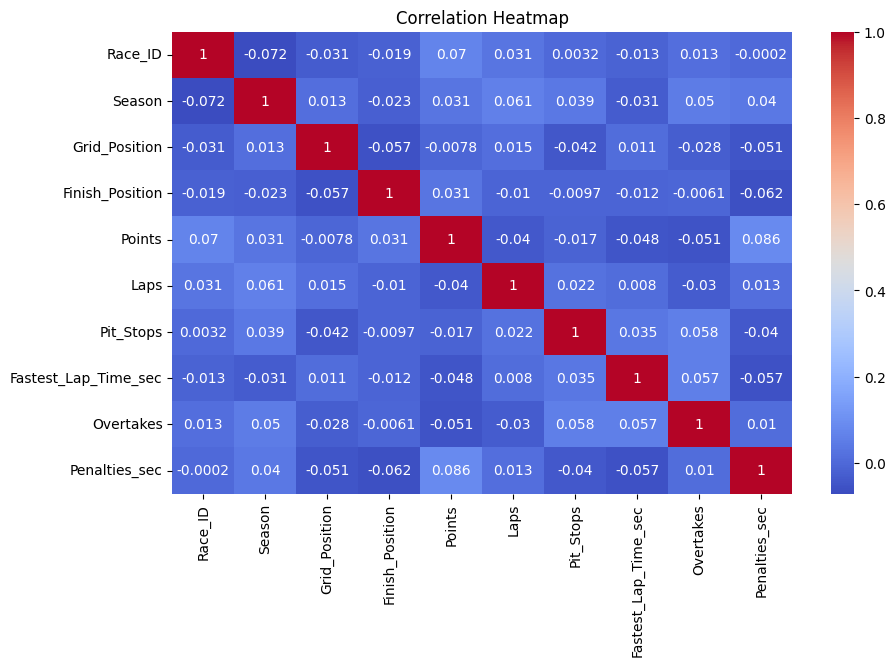

In [235]:
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=np.number) # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

This heatmap shows relationship between numerical columns.
Values close to 1 or -1 show strong correlation.

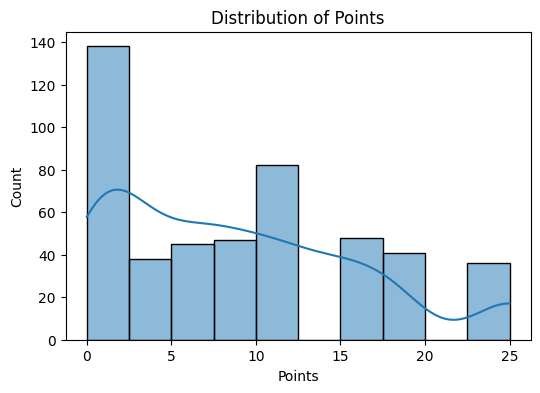

In [236]:
plt.figure(figsize=(6,4))
sns.histplot(df['Points'], kde=True)
plt.title("Distribution of Points")
plt.show()


Histogram shows how values are distributed.
KDE shows density curve.

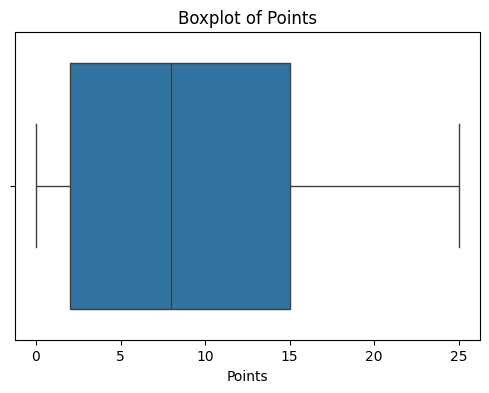

In [237]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Points'])
plt.title("Boxplot of Points")
plt.show()


Boxplot helps detect outliers.
Dots outside box represent extreme values.

In [238]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

Categorical missing values are replaced by most frequent value (mode).

In [239]:
df = df.drop_duplicates()

Duplicate rows are removed to improve data quality.

In [240]:
df.dtypes

,0
Race_ID,int64
Season,int64
Driver,object
Team,object
Circuit,object
Grid_Position,int64
Finish_Position,int64
Points,float64
Laps,int64
Pit_Stops,float64


Check if any column should be int, float, datetime.

##Outlier Treatment

In [241]:
Q1 = df['Points'].quantile(0.25)
Q3 = df['Points'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

lower, upper

(np.float64(-17.5), np.float64(34.5))

IQR method calculates acceptable range.
Values outside are outliers.

In [242]:
df = df[(df['Points'] >= lower) & (df['Points'] <= upper)]

Extreme values are removed to make data stable.

After One Hot Encoding, number of columns increases.
This happens because new dummy variables are created.

In [243]:
print("Before Encoding:", df.shape)
print("After Encoding:", df_encoded.shape)

Before Encoding: (475, 15)
After Encoding: (475, 40)


##DATA VISUALIZATION

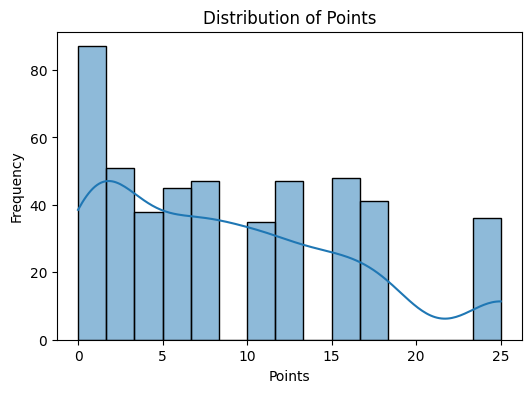

In [244]:
plt.figure(figsize=(6,4))
sns.histplot(df['Points'], kde=True, bins=15)
plt.title("Distribution of Points")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.show()


Most drivers scored between ___ and ___ points.
Distribution is (normal/skewed).

##Box Plot (Outliers + Spread)

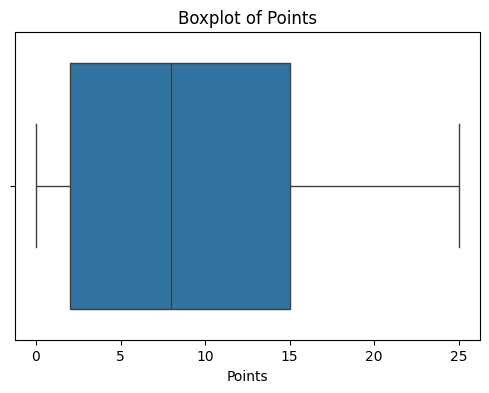

In [245]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Points'])
plt.title("Boxplot of Points")
plt.show()

Some extreme values are present.
These are considered outliers.

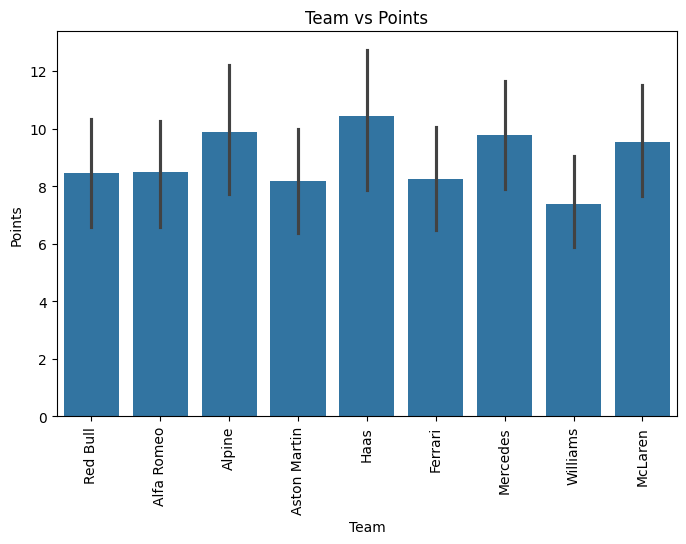

In [246]:
plt.figure(figsize=(8,5))
sns.barplot(x='Team', y='Points', data=df)
plt.xticks(rotation=90)
plt.title("Team vs Points")
plt.show()

##Z-Score (Statistical Method)

In [254]:
z_scores = stats.zscore(df['Points'])
outliers = df[(z_scores > 3) | (z_scores < -3)]
outliers


,Race_ID,Season,Driver,Team,Circuit,Grid_Position,Finish_Position,Points,Laps,Pit_Stops,Fastest_Lap_Time_sec,DNF,Weather,Overtakes,Penalties_sec


Z > 3 or Z < -3.

Z-score method detects statistically extreme values.

In [255]:
df['Circuit'].nunique()

8

This shows the total number of unique race circuits in the dataset.

In [256]:
df['Weather'].value_counts()

,count
Weather,
Rainy,162
Sunny,157
Cloudy,156


This indicates the frequency of different weather conditions during races.

In [257]:
df.groupby('Driver')['Points'].sum().sort_values(ascending=False).head()

,Points
Driver,
Max Verstappen,534.0
Carlos Sainz,485.0
Esteban Ocon,477.0
George Russell,456.0
Oscar Piastri,452.0


This lists the top 5 drivers based on their total accumulated points, indicating top performers.

In [258]:
df['Circuit'].nunique()

8

This shows the total number of unique race circuits in the dataset.

In [259]:
df['Weather'].value_counts()

,count
Weather,
Rainy,162
Sunny,157
Cloudy,156


This indicates the frequency of different weather conditions during races.

In [260]:
df.groupby('Driver')['Points'].sum().sort_values(ascending=False).head()

,Points
Driver,
Max Verstappen,534.0
Carlos Sainz,485.0
Esteban Ocon,477.0
George Russell,456.0
Oscar Piastri,452.0


This lists the top 5 drivers based on their total accumulated points, indicating top performers.

In [261]:
df['Circuit'].nunique()

8

This shows the total number of unique race circuits in the dataset.

In [262]:
df['Weather'].value_counts()

,count
Weather,
Rainy,162
Sunny,157
Cloudy,156


This indicates the frequency of different weather conditions during races.

In [263]:
df.groupby('Driver')['Points'].sum().sort_values(ascending=False).head()

,Points
Driver,
Max Verstappen,534.0
Carlos Sainz,485.0
Esteban Ocon,477.0
George Russell,456.0
Oscar Piastri,452.0


This lists the top 5 drivers based on their total accumulated points, indicating top performers.

In [264]:
df['Circuit'].nunique()

8

This shows the total number of unique race circuits in the dataset.

In [265]:
df['Weather'].value_counts()

,count
Weather,
Rainy,162
Sunny,157
Cloudy,156


This indicates the frequency of different weather conditions during races.

In [266]:
df.groupby('Driver')['Points'].sum().sort_values(ascending=False).head()

,Points
Driver,
Max Verstappen,534.0
Carlos Sainz,485.0
Esteban Ocon,477.0
George Russell,456.0
Oscar Piastri,452.0


This lists the top 5 drivers based on their total accumulated points, indicating top performers.

###Practising more about Visualization

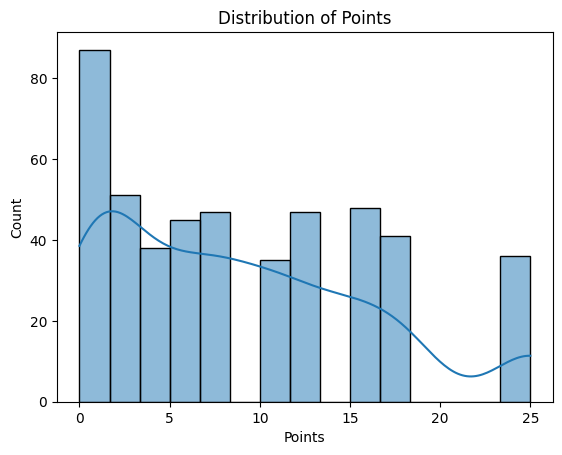

In [248]:
sns.histplot(df['Points'], bins=15, kde=True)
plt.title("Distribution of Points")
plt.show()


Shows frequency of points.
Helps detect skewness and peaks.

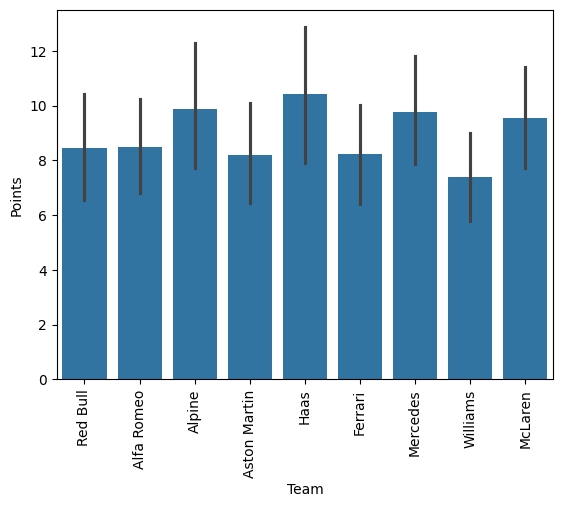

In [249]:
sns.barplot(x='Team', y='Points', data=df)
plt.xticks(rotation=90)
plt.show()

Compares team performance.

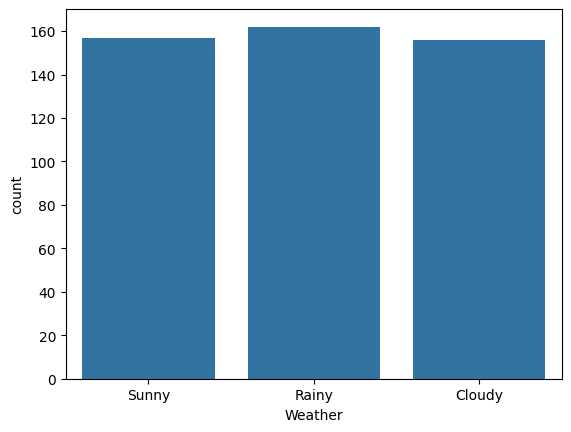

In [250]:
sns.countplot(x='Weather', data=df)
plt.show()


Shows how often each weather occurred.

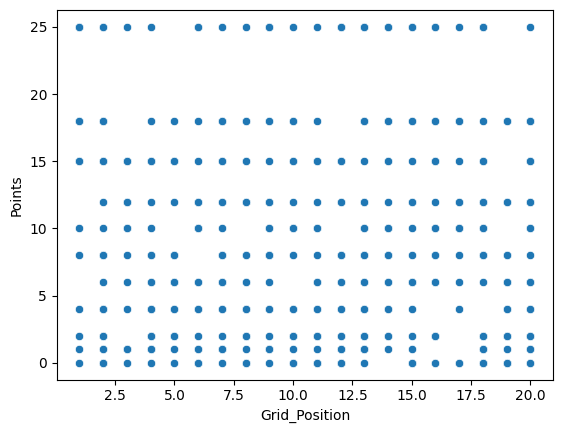

In [251]:
sns.scatterplot(x='Grid_Position', y='Points', data=df)
plt.show()

Shows relation between start position and points.

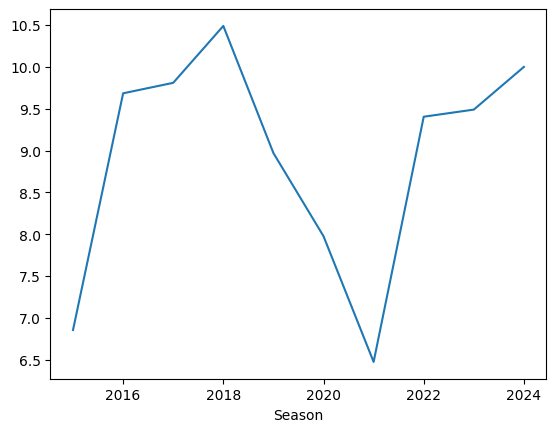

In [252]:
season_avg = df.groupby('Season')['Points'].mean()

sns.lineplot(x=season_avg.index, y=season_avg.values)
plt.show()


Shows performance trend over seasons.